## Identificare code smells con approcci basati su Machine Learning

In [44]:
# Import delle librerie necessarie
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, PrecisionRecallDisplay, roc_auc_score

In [45]:
result = pd.read_csv("../dataset/complete_dataset.csv")
result.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CBO,20861.0,9.069316,11.370901,0.0,2.000000,5.0,12.0,207.0
CYCLO,20861.0,36.428359,71.593285,0.0,5.000000,14.0,34.0,956.0
DIT,20861.0,1.576387,0.494142,1.0,1.000000,2.0,2.0,2.0
ELOC,20861.0,209.126983,461.044339,2.0,24.000000,61.0,168.0,5438.0
FanIn,20861.0,145.199271,909.997981,0.0,1.000000,6.0,29.0,31934.0
FanOut,20861.0,39.832894,99.290150,0.0,1.000000,10.0,36.0,1926.0
LCOM,20861.0,195.574757,1016.795110,0.0,0.000000,3.0,36.0,21736.0
LOC,20861.0,209.126983,461.044339,2.0,24.000000,61.0,168.0,5438.0
LOCNAMM,20861.0,206.116869,458.603401,2.0,23.000000,59.0,166.0,5438.0
NOA,20861.0,5.989646,20.016290,0.0,0.000000,2.0,6.0,1634.0


In [46]:
result

,ComponentName,Project,CBO,CYCLO,DIT,ELOC,FanIn,FanOut,LCOM,LOC,...,WLOCNAMM,WMC,WMCNAMM,NMNOPARAM,CDSBP,CC,LC,LZC,RB,SC
0,example.Hello,ant-ivy-2.0.0-alpha2,1.0,1.0,1.0,11.0,3.0,4.0,0.0,11.0,...,6.000000,1.0,0.0,0.0,0,0,0,0,0,0
1,example.ConfigurationsExample,ant-ivy-2.0.0-alpha2,7.0,4.0,1.0,34.0,0.0,10.0,0.0,34.0,...,32.000000,4.0,0.0,0.0,0,0,0,0,0,0
2,filter.FilterProvider,ant-ivy-2.0.0-alpha2,0.0,4.0,1.0,18.0,1.0,3.0,0.0,18.0,...,16.000000,4.0,0.0,1.0,0,0,0,0,0,0
3,filter.IFilter,ant-ivy-2.0.0-alpha2,0.0,1.0,1.0,3.0,17.0,0.0,0.0,3.0,...,1.000000,1.0,0.0,0.0,0,0,0,0,0,0
4,filter.ccimpl.CCFilter,ant-ivy-2.0.0-alpha2,6.0,7.0,1.0,18.0,3.0,8.0,1.0,18.0,...,9.500000,7.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20857,jaxp.InputData,xerces2-j-Xerces-J_2_3_0,2.0,6.0,2.0,18.0,12.0,2.0,0.0,18.0,...,5.000000,6.0,0.0,1.0,0,0,0,0,0,0
20858,jaxp.JAXP12Tests,xerces2-j-Xerces-J_2_3_0,8.0,30.0,2.0,176.0,0.0,57.0,15.0,176.0,...,12.363636,30.0,0.0,10.0,0,0,0,0,0,0
20859,jaxp.JAXPConstants,xerces2-j-Xerces-J_2_3_0,0.0,0.0,1.0,11.0,4.0,0.0,0.0,11.0,...,NaN,0.0,0.0,0.0,0,0,0,0,0,0
20860,thread.Test,xerces2-j-Xerces-J_2_3_0,11.0,21.0,1.0,421.0,320.0,26.0,0.0,421.0,...,41.000000,21.0,0.0,1.0,0,0,0,0,0,0


## Data Preparation

### Data Cleaning

#### Poiché sono presenti valori Nan (Not a Number), onde evitare problemi di classificazione è preferibile eliminare i le istanze contenenti dati mancanti in quanto presenti in piccole quantità

#### Iniziamo vedendo quante istanze con valori NaN sono presenti

In [47]:
result.isnull().sum()

ComponentName      0
Project            0
CBO                1
CYCLO              1
DIT                1
ELOC               1
FanIn              1
FanOut             1
LCOM               1
LOC                1
LOCNAMM            1
NOA                1
NOC                1
NOM                1
NOMNAMM            1
NOPA               1
PMMM               1
PRB                1
WLOCNAMM         719
WMC                1
WMCNAMM            1
NMNOPARAM          1
CDSBP              0
CC                 0
LC                 0
LZC                0
RB                 0
SC                 0
dtype: int64

#### Analizziamo i risultati dopo l'eliminazione

In [48]:
result.dropna(inplace=True)
#Valori NaN eliminati
result.isnull().sum()

ComponentName    0
Project          0
CBO              0
CYCLO            0
DIT              0
ELOC             0
FanIn            0
FanOut           0
LCOM             0
LOC              0
LOCNAMM          0
NOA              0
NOC              0
NOM              0
NOMNAMM          0
NOPA             0
PMMM             0
PRB              0
WLOCNAMM         0
WMC              0
WMCNAMM          0
NMNOPARAM        0
CDSBP            0
CC               0
LC               0
LZC              0
RB               0
SC               0
dtype: int64

### Feature selection

#### Alcuni attributi, come: ComponentName o Project non sono utili ai fini della classificazione, quindi verranno eliminati

In [49]:
result.drop(['ComponentName'], axis=1, inplace=True)

### Data Balancing
##### La variabile target che il modello deve predire in questo file è:
- CDSBP: Class Data Should Be Private;
##### Analizziamo la sua distribuzione per quantificare quanto è bilanciato il dataset rispetto alla variabile dipendente.


<AxesSubplot: xlabel='CDSBP', ylabel='Count'>

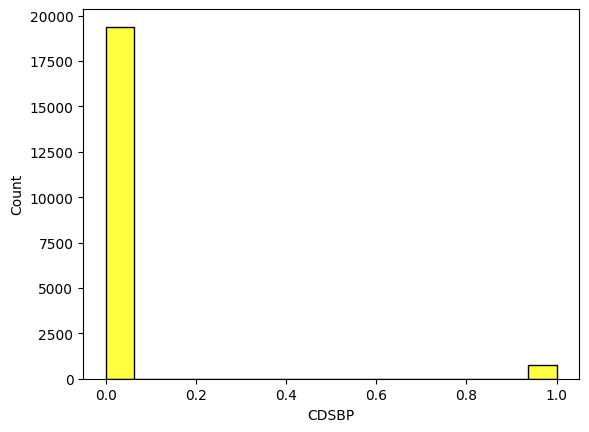

In [50]:
sns.histplot(result['CDSBP'], legend=True, color='yellow')

#### Le istanze di classi che non contengono code smell di tipo "Class Data Should Be Private" sono 19393, mentre quelle che contengono tale smell sono solo 750

In [51]:
result[result['CDSBP'] == 0].count()

Project      19393
CBO          19393
CYCLO        19393
DIT          19393
ELOC         19393
FanIn        19393
FanOut       19393
LCOM         19393
LOC          19393
LOCNAMM      19393
NOA          19393
NOC          19393
NOM          19393
NOMNAMM      19393
NOPA         19393
PMMM         19393
PRB          19393
WLOCNAMM     19393
WMC          19393
WMCNAMM      19393
NMNOPARAM    19393
CDSBP        19393
CC           19393
LC           19393
LZC          19393
RB           19393
SC           19393
dtype: int64

In [52]:
result[result['CDSBP'] == 1].count()

Project      750
CBO          750
CYCLO        750
DIT          750
ELOC         750
FanIn        750
FanOut       750
LCOM         750
LOC          750
LOCNAMM      750
NOA          750
NOC          750
NOM          750
NOMNAMM      750
NOPA         750
PMMM         750
PRB          750
WLOCNAMM     750
WMC          750
WMCNAMM      750
NMNOPARAM    750
CDSBP        750
CC           750
LC           750
LZC          750
RB           750
SC           750
dtype: int64

#### Da come è possibile intuire, il dataset è fortemente sbilanciato. Le possibili soluzioni a questo problema sono due:
- Oversampling: aumentare il numero di istanze presenti nelle classi di minoranza;
- Undersampling: diminuire il numero di istanze presenti nelle classi di maggioranza;

#### Entrambe le soluzioni possono introdurre ulteriori problematiche, ad esempio l'undersampling casuale potrebbe portare alla rimozione di istanze particolarmente rilevanti per l’apprendimento del modello, mentre nel caso dell'oversampling, la duplicazione di istanze potrebbe creare overfitting

#### Bilanciamo il dataset aumentando il numero di istanze della classe di minoranza CDSBP. Scegliamo casualmente 250 istanze dalla classe di minoranza e aggiungiamo queste ultime al dataset.

In [53]:
# # df_min classe di minoranza
# df_min = result[result['CDSBP'] == 1]

# # Seme casuale
# random = np.random.RandomState(None)

# # Scelta casuale di 264 istanze 
# idx = random.choice(df_min.index, 375, replace=True)
    
# # seleziona le istanze del dataset originale corrispondenti agli indici selezionati
# df_over = pd.concat([result, df_min.loc[idx]])

# # finito il bilanciamento

#### Normalizzazione e addestramento

In [54]:
# X = df_over.drop(['CC', 'LC', 'CDSBP', 'LZC', 'RB', 'SC'], axis=1)
# y = df_over['CDSBP']
normalizer = MinMaxScaler()

In [55]:
import os
path = "../../projects"
projects = []

# Itera su tutti i file e le cartelle nella cartella specificata
for item in os.listdir(path):
    # Se l'elemento nella cartella è una cartella, aggiungi il nome alla lista
    if os.path.isdir(os.path.join(path, item)):
       projects.append(item)
    # Stampa la lista di nomi dei progetti
print(projects)

['ant-ivy-2.0.0-alpha2', 'ant-rel-1.8.3', 'cassandra-cassandra-1.0.0', 'elasticsearch-v0.19.0', 'hadoop-release-0.6.0', 'hive-release-0.9.0', 'hsqldb-2.2.8', 'karaf-karaf-2.3.0', 'lucene-releases-lucene-solr-3.6.0', 'manifold-cf-release-0.6', 'nutch-release-1.4', 'pig-release-0.8.0', 'qpid-0.14', 'struts-STRUTS_2_3_4', 'xerces2-j-Xerces-J_2_3_0']


In [56]:
from sklearn.model_selection import GridSearchCV

# Dichiarazione delle liste per memorizzare i valori delle metriche
all_scores_mcc = []
all_scores_acc = []
all_scores_prec = []
all_scores_rec = []
all_scores_f1 = []

# Creazione dell'oggetto KFold per eseguire la cross validation con 5 fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Iterazione sui progetti
for project in projects:

    # Caricamento dei dati specifici del progetto
    new_df = result[result['Project'] == project]

    X = new_df.drop(['CC', 'LC', 'CDSBP', 'LZC', 'RB', 'SC','Project'], axis=1)
    y = new_df['CDSBP']
    print(project, len(new_df))
    # Dichiarazione delle liste per memorizzare i valori delle metriche per il progetto corrente
    scores_mcc = []
    scores_acc = []
    scores_prec = []
    scores_rec = []
    scores_f1 = []

    # Esecuzione della cross validation
    for train_index, test_index in kf.split(X):
        # Split dei dati in training set e test set
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Normalizzazione dei dati utilizzando normalizer
        X_train_normalized = normalizer.fit_transform(X_train)
        X_test_normalized = normalizer.transform(X_test)

        # Definizione dei parametri da testare
        param_grid = {
            'n_estimators': [100, 200, 300],  # Numero di alberi decisionali
            'max_depth': [None, 5, 10],  # Profondità massima degli alberi
            'min_samples_split': [2, 5, 10],  # Numero minimo di campioni richiesti per suddividere un nodo
        }

        # Creazione dell'oggetto GridSearchCV
        grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_grid=param_grid,
                                   scoring='accuracy',  # Metrica di valutazione
                                   cv=5)  # Numero di fold della cross-validation

        # Esecuzione della grid search
        grid_search.fit(X_train_normalized, y_train)

        # Ottenimento del modello con i migliori iperparametri
        best_model = grid_search.best_estimator_

        # Valutazione del modello sui dati di test normalizzati
        y_pred = best_model.predict(X_test_normalized)

        # Calcolo delle metriche per il progetto corrente
        precision = precision_score(y_test, y_pred, average='micro')
        accuracy = accuracy_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='micro')
        f1 = f1_score(y_test, y_pred, average='macro')

        scores_mcc.append(mcc)
        scores_acc.append(accuracy)
        scores_f1.append(f1)
        scores_prec.append(precision)
        scores_rec.append(recall)

    # Calcolo della media delle metriche per il progetto corrente
    avg_mcc = np.mean(scores_mcc)
    avg_acc = np.mean(scores_acc)
    avg_prec = np.mean(scores_prec)
    avg_rec = np.mean(scores_rec)
    avg_f1 = np.mean(scores_f1)

    # Aggiunta dei valori delle metriche alla lista per tutti i progetti
    all_scores_mcc.append(avg_mcc)
    all_scores_acc.append(avg_acc)
    all_scores_prec.append(avg_prec)
    all_scores_rec.append(avg_rec)
    all_scores_f1.append(avg_f1)

# Calcolo della media delle metriche per tutti i progetti
overall_avg_mcc = np.mean(all_scores_mcc)
overall_avg_acc = np.mean(all_scores_acc)
overall_avg_prec = np.mean(all_scores_prec)
overall_avg_rec = np.mean(all_scores_rec)
overall_avg_f1 = np.mean(all_scores_f1)


ant-ivy-2.0.0-alpha2 434
ant-rel-1.8.3 1897
cassandra-cassandra-1.0.0 747
elasticsearch-v0.19.0 2393
hadoop-release-0.6.0 393
hive-release-0.9.0 1359
hsqldb-2.2.8 1198
karaf-karaf-2.3.0 572


C:\Users\demai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\demai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\demai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\demai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-

lucene-releases-lucene-solr-3.6.0 3879
manifold-cf-release-0.6 914
nutch-release-1.4 324
pig-release-0.8.0 1452
qpid-0.14 1629
struts-STRUTS_2_3_4 1894
xerces2-j-Xerces-J_2_3_0 1058


In [57]:
print("Overall Average MCC:", overall_avg_mcc)

Overall Average MCC: 0.8339075293870495


In [58]:
print("Overall Average Accuracy:", overall_avg_acc)

Overall Average Accuracy: 0.9980837266689377


In [59]:
print("Overall Average Precision:", overall_avg_prec)

Overall Average Precision: 0.9980837266689377


In [60]:
print("Overall Average Recall:", overall_avg_rec)

Overall Average Recall: 0.9980837266689377


In [61]:
print("Overall Average F1-score:", overall_avg_f1)

Overall Average F1-score: 0.9859881989772247
